# Alzheimer prediction using gray matter density from T1w MRI 

**Deadline**: Upload this notebook (rename it as 'TP4-IMA205-YOUR-SURNAME.ipynb') with your answers to the Site pédagogique before the 18th of March 2020 (23h59).

Please complete the code where you see XXXXXXXXXXXX and answer the questions.

We will use a dataset composed of neuroimaging features from brain T1w MR images of 752 subjects, 416 controls and 336 with Alzheimer’s disease. Following the pipeline described in [1], all images are first normalized to a
common space, providing a voxel-wise correspondence across subjects. Then, gray matter density is computed at each voxel and averaged over a set of ROIs (Region of Interest) of an atlas, at the beginning you will use the [AAL2 atlas](http://www.gin.cnrs.fr/en/tools/aal/). Data comes from several freely available datasets, like [ADNI](http://adni.loni.usc.edu/) and [OASIS](https://www.oasis-brains.org/), and has been pre-processed by the [Clinica](http://www.clinica.run/) team using the procedure explained in [1].

Please load the data from the file: *dataTP.npz* where *T1x* is a matrix containing the averaged density (each row is a subject and each column a feature), *y* is a vector containing the diagnosis (0 for controls and 1 for Alzheimer’s patients) and *ROIlabelsx* contains the name of the ROI of each feature. Here, *x* can take the name of the three atlases you have at your disposal: AAL2, [AICHA](http://www.gin.cnrs.fr/fr/outils/aicha/), [HAMMERS](https://brain-development.org/brain-atlases/adult-brain-atlases/).

**Reference**:
[1] J. Samper-González, N. Burgos, S. Bottani, S. Fontanella, P. Lu, A. Marcoux, A. Routier, J. Guillon, M. Bacci, J. Wen, A. Bertrand, H. Bertin, M.-O. Habert, S. Durrleman, T. Evgeniou, O. Colliot. *Reproducible evaluation of classification methods in Alzheimer's disease: framework and application to MRI and PET data*. NeuroImage, 2018 

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import warnings
warnings.filterwarnings('ignore', category=ImportWarning)

# Libraries
import numpy as np
import matplotlib.pyplot as plt
!pip install -q nilearn
from nilearn import plotting
%matplotlib inline
np.random.seed(seed=42)

from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='11cQmPm64k3T7ml5fPLetZgb1j1AjHBH8',
dest_path='./dataTP.npz')
gdd.download_file_from_google_drive(file_id='1S7e5IrPygE4VV0JTwqJIlyO2S_NhsiI4',
dest_path='./AtlasAAL2.nii')
gdd.download_file_from_google_drive(file_id='1E0pu5jIMpgcs2DQ8lBGWliwEBZvKrnV9',
dest_path='./AtlasAICHA.nii')
gdd.download_file_from_google_drive(file_id='1yltKwULrkHYh79RAh_zAg08r8pQMjRlQ',
dest_path='./AtlasHAMMERS.nii')

with np.load('./dataTP.npz',allow_pickle=True) as data:
    T1AAL2 = data['T1AAL2'] # data from AAL2 Atlas
    T1AICHA = data['T1AICHA'] # data from AICHA Atlas
    T1HAMMERS = data['T1HAMMERS'] # data from HAMMERS Atlas  
    y = data['y'] # classes, 0 for controls and 1 for patients    
    ROIlabelsAAL2 = data['ROIlabelsAAL2'] # labels for ROIs of atlas AAL2 
    ROIlabelsAICHA = data['ROIlabelsAICHA']    # labels for ROIs of atlas AICHA 
    ROIlabelsHAMMERS = data['ROIlabelsHAMMERS']    # labels for ROIs of atlas HAMMERS 

In [2]:
# Choose Atlas (here AAL2)
X=T1AAL2
labels=ROIlabelsAAL2
atlas='./AtlasAAL2.nii'

N,M = X.shape # number subjects and ROIs
class_names = ["control","alzheimer"] # y=0, y=1

print('Number of controls and Alzheimer patients is respectively: {0} and {1}'.format(N-np.sum(y), np.sum(y)))
print('Number of ROI is: {0}'.format(M))

Number of controls and Alzheimer patients is respectively: 416.0 and 336.0
Number of ROI is: 120


Using the library nilearn we can also plot the atlas used to define the ROIs:

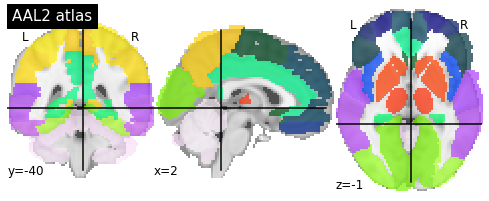

In [3]:
plotting.plot_roi(atlas, title="AAL2 atlas")
plotting.show()

In this TP we will use Decision Trees, Bagging and Random Forests. Let's start with Decision Trees. First of all, we need to scale the features so that each feature will have average equal to 0 and unit variance and create a training and test set.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the data
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)


Then, we can fit a Decision tree, with the default setting, using the following code:

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Fitting Decision Trees with maximum depth equal to 4 (to keep the output simple)
Tree = DecisionTreeClassifier(max_depth=4)
Tree.fit(X_train,y_train)

# Score in the training set
print('Score in the training set is {0}'.format(Tree.score(X_train,y_train)))
# Score in the test set
print('Score in the test set is {0}'.format(Tree.score(X_test,y_test)))

Score in the training set is 0.8687872763419483
Score in the test set is 0.7389558232931727


Instead of using the default hyperparameters, we could also look for the best ones. Among the hyperparameters implemented in *scikit-learn* we could use *'min_samples_split'*, the minimum number of samples required to split an internal node, and/or *'min_samples_leaf'*, the minimum number of samples required to be present at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

Plot the training and test score for different values of 'min_samples_split' (for instance between 1 and 10) WITHOUT using Cross Validation. Do the same for 'min_samples_leaf'. **Question:** What is the best value ? What happens if you split differently your data ?

**The best values we get are the values maximising the test score. Hence, we obtain min_samples_split=7 and min_samples_leaf=9. However, these results depend highly on the data: another random state or splitting of the data will give completely different parameters.**

[]

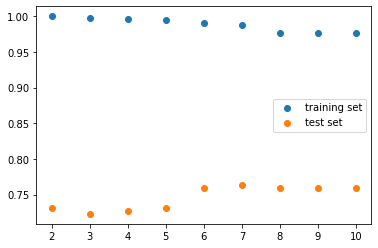

In [6]:
# 'min_samples_split'
TTest=[]
TTrain=[]

for min_sample in range(2,11):
  Tree = DecisionTreeClassifier(max_depth=None, min_samples_split=min_sample,random_state=42)
  Tree.fit(X_train, y_train)
  TTrain.append(Tree.score(X_train,y_train))
  TTest.append(Tree.score(X_test, y_test))

t = range(2,11)
plt.scatter(t, TTrain, label = "training set")
plt.scatter(t, TTest, label = "test set")
plt.legend()
plt.plot()


[]

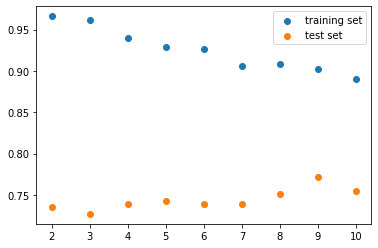

In [7]:
# 'min_samples_leaf'
TTest=[]
TTrain=[]

for min_sample in range(2,11):
  Tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=min_sample,random_state=42)
  Tree.fit(X_train, y_train)
  TTrain.append(Tree.score(X_train,y_train))
  TTest.append(Tree.score(X_test, y_test))

t = range(2,11)
plt.scatter(t, TTrain, label = "training set")
plt.scatter(t, TTest, label = "test set")
plt.legend()
plt.plot()

Try to add Gaussian noise to the data (using for instance zero mean and 0.5 for the std) and, using the best hyperparameters found before, look at the test score. Repeat this process several times (at least 100 times) and compare the results with the score obtained without adding noise. **Question:** Are the results stable ? Hint: you could use for instance *noise = np.random.normal(mu, sigma)*

**Adding noise yields a worse train score and a worse test score on average. On top of that, it completely disturbs the structure of the tree. Indeed, even with a little gaussian noise, the main nodes of the tree are even not the same! We can then note the very high instability of this method.**

The mean training score is: 0.8983262586642308
The training score standard deviation is: 0.010358746829530384

The mean test score is: 0.7158905893845653
The test score standard deviation is: 0.034215058452968565



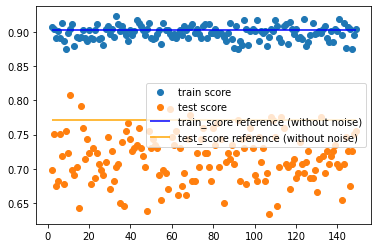

In [8]:
train_score, test_score = [], []
n, d = X_scaled.shape

Tree = DecisionTreeClassifier(max_depth=None, min_samples_split=7, min_samples_leaf=9, random_state=42)
Tree.fit(X_train, y_train)
train_score_ref = Tree.score(X_train,y_train) # without noise
test_score_ref = Tree.score(X_test,y_test) # without noise


for index in range (2,150): 
  sigma = 0.5
  X_scaled_noise = X_scaled + sigma*np.random.randn(n,d)
  X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_scaled_noise, y, test_size=0.33, random_state=42)

  Tree = DecisionTreeClassifier(max_depth=None, min_samples_leaf=np.argmax(TTest),random_state=42)
  Tree.fit(X_train_noise, y_train_noise)
  # Score in the training set
  train_score.append(Tree.score(X_train_noise,y_train_noise)) 
  # Score in the test set
  test_score.append((Tree.score(X_test_noise,y_test_noise)))

## Mean score and standard deviations of the score
print("The mean training score is:", np.mean(train_score))
print("The training score standard deviation is:", np.std(train_score))
print()
print("The mean test score is:", np.mean(test_score))
print("The test score standard deviation is:", np.std(test_score))

print()

## Plot the result
t_bis = range(2,150)
plt.scatter(t_bis, train_score, label = "train score")
plt.scatter(t_bis, test_score, label = "test score")
plt.hlines(train_score_ref, t_bis[0], t_bis[-1], label = "train_score reference (without noise)", color='blue')
plt.hlines(test_score_ref, t_bis[0], t_bis[-1], label = "test_score reference (without noise)", color='orange')
plt.legend()
plt.show()


To plot decision trees, we can also use the *graphviz* library. If you need to install it locally, you can do it using *conda install python-graphviz*. 
 

First plot the tree learnt on the original data, witout adding noise.

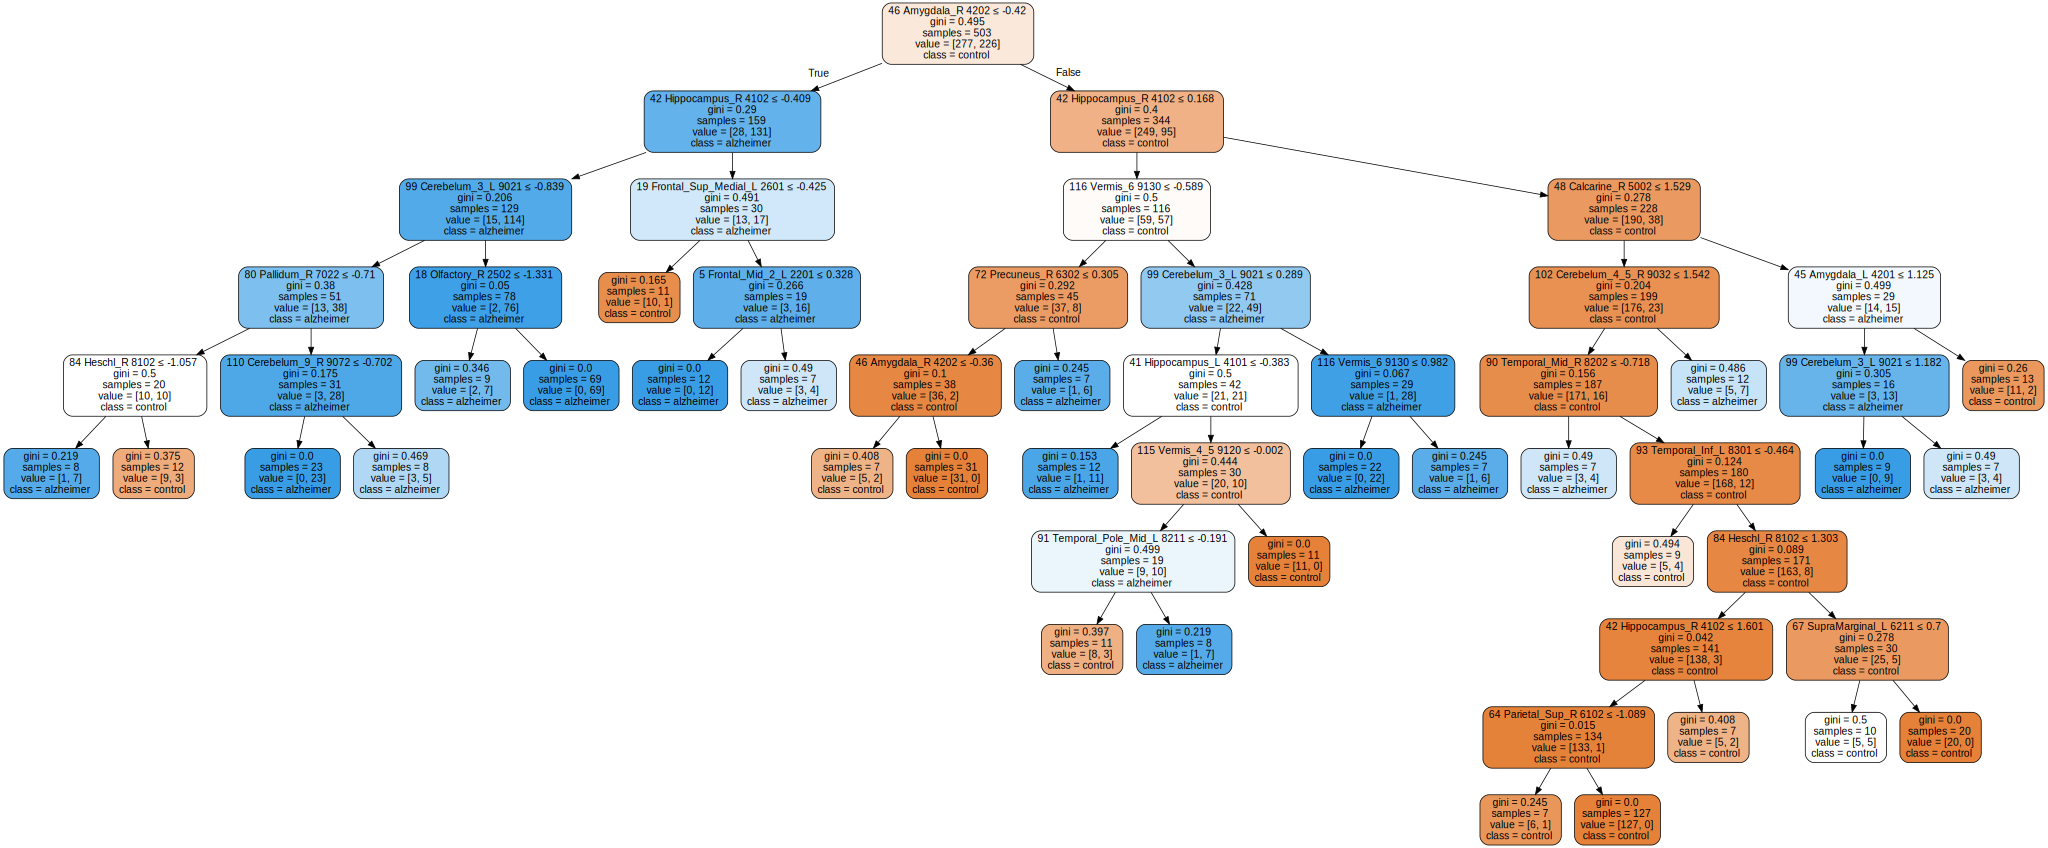

In [9]:
import graphviz 

Tree.fit(X_train,y_train)
dot_data = tree.export_graphviz(Tree, out_file=None,feature_names=labels,class_names=class_names,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

Now, plot the tree learnt on noisy data. **Question:** Is it the same ? You can try several times, for different levels of noise. Comment the results.

**The tree is quite different as explained earlier, as a result of the high instability of the decision trees - even with a small level of noise.**

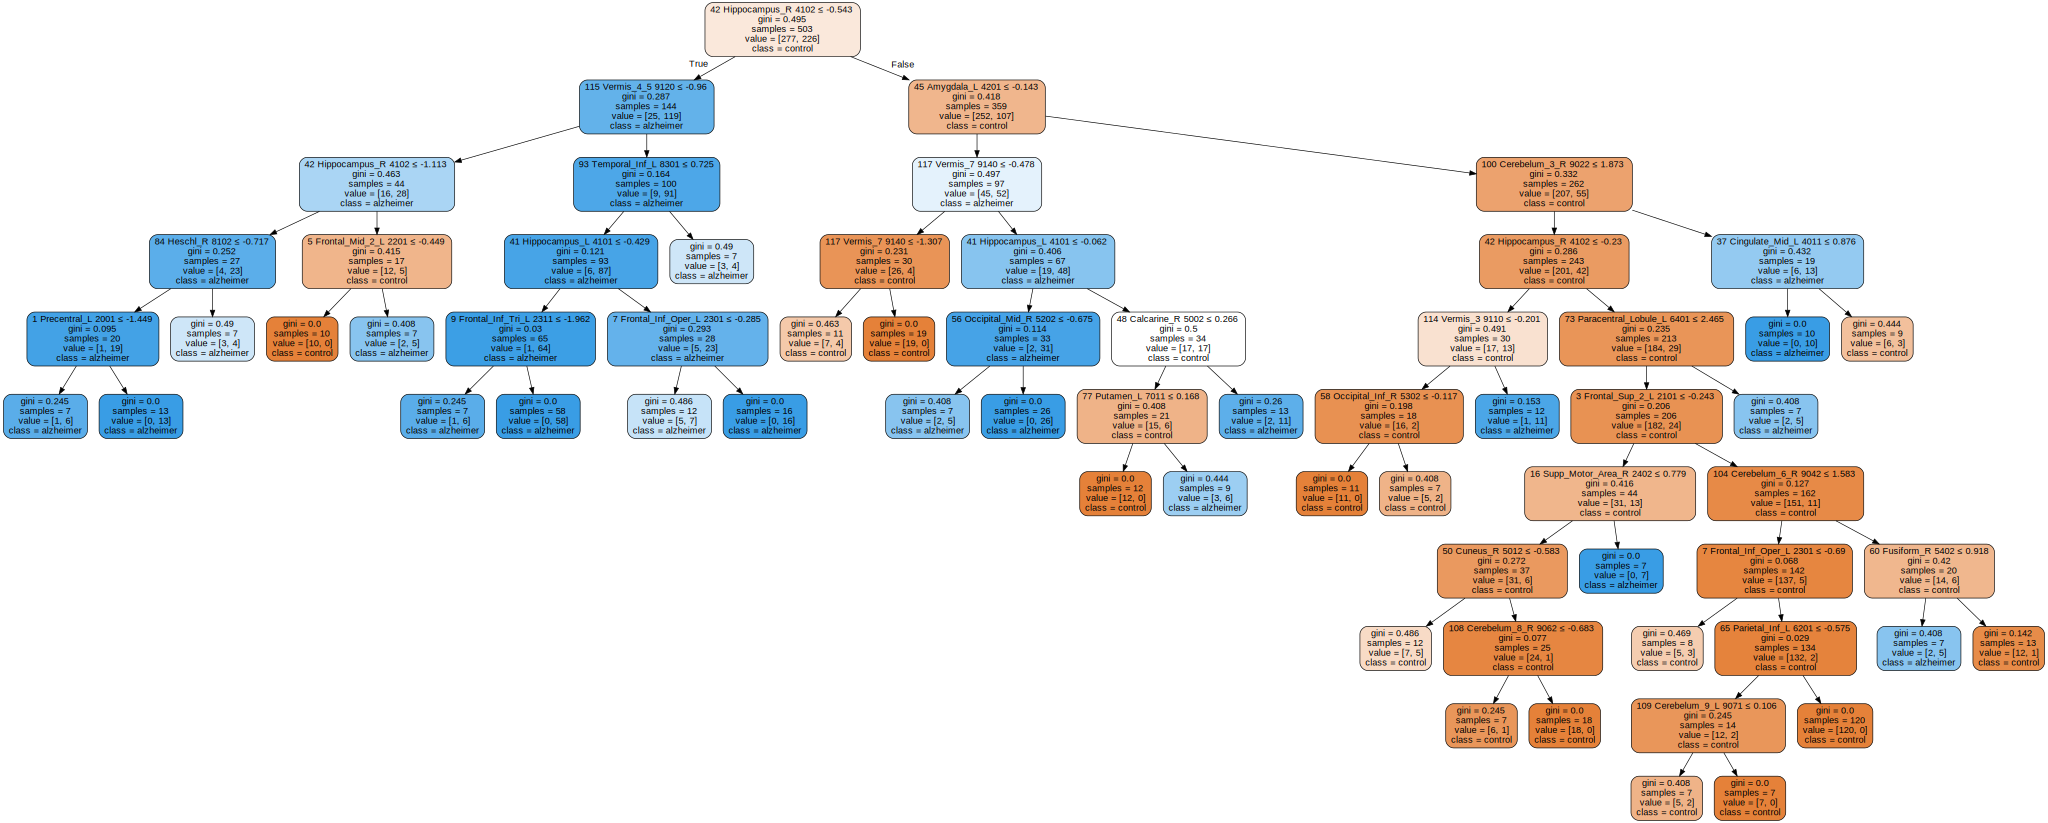

In [10]:
Tree.fit(X_train_noise,y_train_noise)
dot_data = tree.export_graphviz(Tree, out_file=None,feature_names=labels,class_names=class_names,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

Instead than using a single split of the data, we could also use Cross Validation to compute the best hyperparameter values for both 'min_samples_split' and 'min_samples_leaf' at the same time and in an automatic way. **Question:** Do you find the same optimal hyperparameters as before ? Hint: use GridSearchCV

**After grid search and cross-validation, we do not find the same hyperparameters as before. We can sensibly assert that the hyperparameters we find with this method are better than the previous ones, as they are computed on a larger scale and at the same time.**

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split': range(2,30), 'min_samples_leaf': range(2,30)}
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

grid = GridSearchCV(Tree, parameters, cv=5,  n_jobs=-1)
grid.fit(X_train, np.ravel(y_train))

min_split_optimal = grid.best_params_.get('min_samples_split')
min_leaf_optimal = grid.best_params_.get('min_samples_leaf')
print('The best min_samples_split is', min_split_optimal, ', the best min_samples_leaf is', min_leaf_optimal, ' with an average validation score equal to ', grid.best_score_)

The best min_samples_split is 3 , the best min_samples_leaf is 8  with an average validation score equal to  0.7615643564356436


Using the optimal hyperparameers, plot again the decision tree using the *graphviz* library. **Question:** Is it the same ? Do you see ROIs that are always present nearby the root of the trees ? Comment the results.

**The main nodes are the same, hence the ROI are indeed the same. However, the bottom of the tree differs, so we cannot assert that the decision tree is _completely_ the same.**

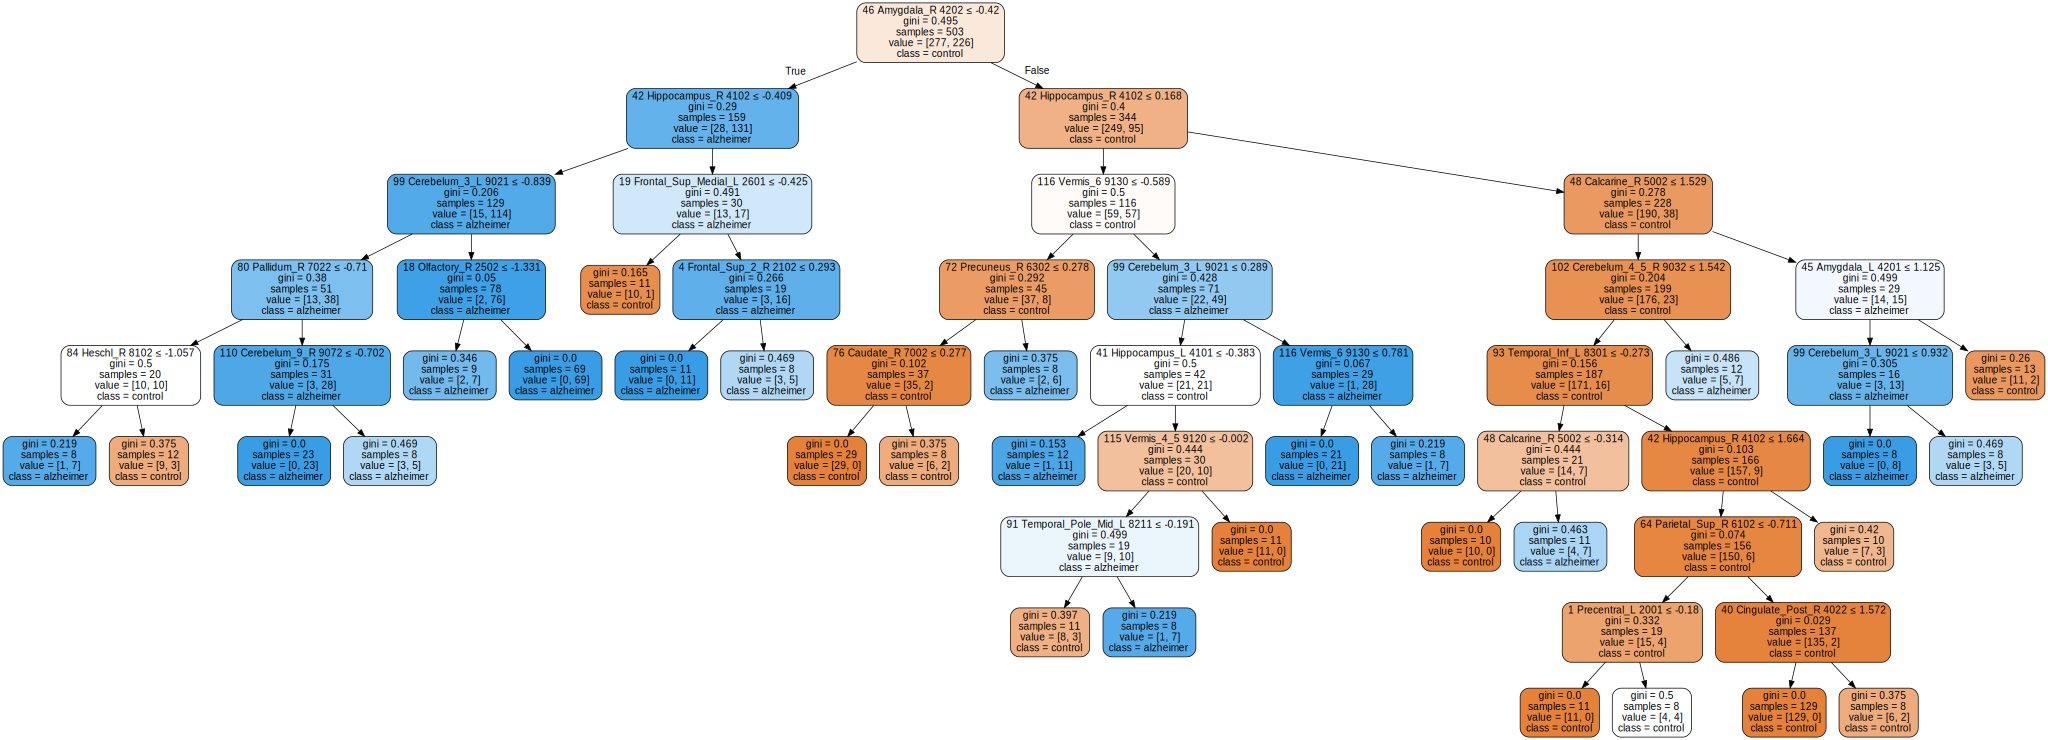

In [12]:
Tree = DecisionTreeClassifier(max_depth=None, min_samples_split=min_split_optimal, 
                              min_samples_leaf=min_leaf_optimal, random_state=42)
Tree.fit(X_train,y_train)

dot_data = tree.export_graphviz(Tree, out_file=None,feature_names=labels,class_names=class_names,filled=True, 
                                rounded=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph

Try to use now Bagging. You can use the following code where we use the previously computed best parameters 'min_samples_leaf' and 'min_samples_split'. **Question:** What happens when you use the original data and the noisy version ? Do you notice any difference in the prediction scores with respect to the results using Decision Trees ? 

**The results after bagging are rather similar, whether it is for the original data or the noisy data. We can then conclude that bagging tends to stabilise the results in the presence of noise, allowing to have a tree with ROI that do not change much.**

In [13]:
from sklearn.ensemble import BaggingClassifier

Tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_split_optimal, min_samples_split=min_leaf_optimal, random_state=42)

p_grid_bagging = {'n_estimators': [5,10,15,20]}      
bag=BaggingClassifier(base_estimator=Tree, random_state=42)

grid_bagging = GridSearchCV(estimator=bag, param_grid=p_grid_bagging, scoring="accuracy", cv=5)
grid_bagging.fit(X_train, y_train.reshape(-1))

print("Best Score: {}".format(grid_bagging.best_score_))
print("Best params: {}".format(grid_bagging.best_params_))
print("Bagging score :",grid_bagging.score(X_test,y_test))

Best Score: 0.8032475247524753
Best params: {'n_estimators': 20}
Bagging score : 0.8353413654618473


In [14]:
Tree = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_split_optimal, min_samples_split=min_leaf_optimal, random_state=42)

p_grid_bagging = {'n_estimators': [5,10,15,20]}      
bag=BaggingClassifier(base_estimator=Tree, random_state=42)
grid_bagging = GridSearchCV(estimator=bag, param_grid=p_grid_bagging, scoring="accuracy", cv=5)
grid_bagging.fit(X_train_noise, y_train_noise.reshape(-1))
print("Best Score: {}".format(grid_bagging.best_score_))
print("Best params: {}".format(grid_bagging.best_params_))
print("Bagging score :",grid_bagging.score(X_test_noise,y_test_noise))

Best Score: 0.7872871287128713
Best params: {'n_estimators': 20}
Bagging score : 0.7991967871485943


The last part of this TP is about Random Forests. We can estimate the three hyperparameters *'n_estimators'*, *'min_samples_leaf'* and *'max_features'*, the number of features to consider when looking for the best split, as before using Cross Validation

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(criterion="gini", random_state=42)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5)
grid_RF.fit(X_train, y_train.reshape(-1))
print("Best Score: {}".format(grid_RF.best_score_))
print("Best params: {}".format(grid_RF.best_params_))

Best Score: 0.8170693069306931
Best params: {'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 30}


**Question:** Using the estimated best hyperparameters, test the performance of Random Forest on the noisy data and compare the results with Decision Trees and Bagging.

**Random forest and bagging seem to work better than decision trees, with a slight advantage for random forest. This classifier also allows to stabilise the results and avoid overfitting.**

In [16]:
best_params=grid_RF.best_params_
RF = RandomForestClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],max_features=best_params["max_features"],n_estimators=best_params["n_estimators"], random_state=0)
RF.fit(X_train,y_train.reshape(-1))
print("Random Forest score without noise:",RF.score(X_test, y_test))
print("Random Forest score with noise:",RF.score(X_test_noise, y_test_noise), "\n")

Tree = DecisionTreeClassifier(max_depth=None, min_samples_split=min_split_optimal, min_samples_leaf = min_leaf_optimal, random_state = 42)
Tree.fit(X_train, y_train.reshape(-1))
print("Decision Trees score without noise:",Tree.score(X_test, y_test))
print("Decision Trees score with noise:",Tree.score(X_test_noise, y_test_noise), "\n")

bag = BaggingClassifier(base_estimator=Tree, n_estimators=15, random_state=42)
bag.fit(X_train,y_train.reshape(-1))
print("Bagging score without noise:",bag.score(X_test, y_test))
print("Bagging score with noise:",bag.score(X_test_noise, y_test_noise))

Random Forest score without noise: 0.8353413654618473
Random Forest score with noise: 0.8032128514056225 

Decision Trees score without noise: 0.751004016064257
Decision Trees score with noise: 0.6746987951807228 

Bagging score without noise: 0.8232931726907631
Bagging score with noise: 0.7951807228915663


We can also use Random Forests to check the importance of the features

Feature ranking:
1. feature 45 representing 46 Amygdala_R 4202
 (0.073080)
2. feature 44 representing 45 Amygdala_L 4201
 (0.069032)
3. feature 41 representing 42 Hippocampus_R 4102
 (0.064159)
4. feature 40 representing 41 Hippocampus_L 4101
 (0.054429)
5. feature 43 representing 44 ParaHippocampal_R 4112
 (0.047404)
6. feature 93 representing 94 Temporal_Inf_R 8302
 (0.032653)
7. feature 92 representing 93 Temporal_Inf_L 8301
 (0.026649)
8. feature 88 representing 89 Temporal_Mid_L 8201
 (0.021777)
9. feature 86 representing 87 Temporal_Pole_Sup_L 8121
 (0.020273)
10. feature 59 representing 60 Fusiform_R 5402
 (0.018825)


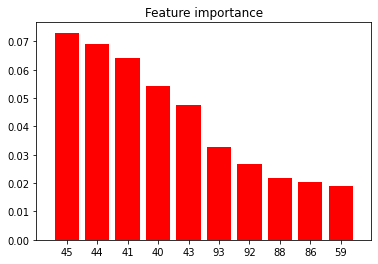

In [17]:
best_params=grid_RF.best_params_
RF = RandomForestClassifier(criterion="gini",min_samples_leaf=best_params["min_samples_leaf"],max_features=best_params["max_features"],n_estimators=best_params["n_estimators"], random_state=0)
RF.fit(X_train,y_train.reshape(-1))

importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d representing %s (%f)" % (f + 1, indices[f], labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(10), importances[indices[0:10]], color="r", align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, 10])
plt.show()

**Question:** Which are the most important features (i.e. ROIs) ?  Based on the two given research papers, you can verify if your results make sense. 

**The most important features are Amygdala_R, Amygdala_L and Hippocampus_R.**

We can also inspect the data using only pairs of the most important features

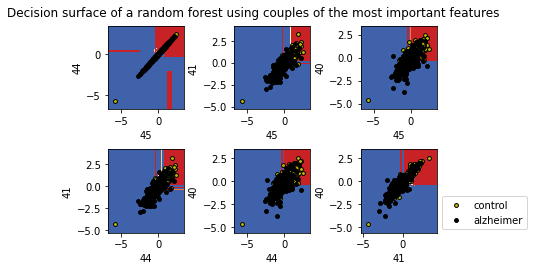

In [18]:
for pairidx, pair in enumerate([ [indices[0],indices[1]], [indices[0],indices[2]], [indices[0],indices[3]],
                                [indices[1],indices[2]], [indices[1],indices[3]], [indices[2],indices[3]] ]):
    # We only take the two corresponding features
    Xpair = X_train[:, pair]
    ypair = y_train.reshape(-1)
    
    # Train
    clf = RF.fit(Xpair, ypair)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = Xpair[:, 0].min() - 1, Xpair[:, 0].max() + 1
    y_min, y_max = Xpair[:, 1].min() - 1, Xpair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(2), "yk"):
        idx = np.where(ypair == i)
        plt.scatter(Xpair[idx, 0], Xpair[idx, 1], c=color, label=class_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a random forest using couples of the most important features")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.axis("tight")
plt.show()

**Question:** Which is the best couple of features ?

**The ideal result would be a perfect classification of yellow dots and black dots. The output that we have here does not lead us to think this is achievable. So we cannot really identify the best couple of features in this configuration, although the couple (40,45) seems a bit better than the others in this respect.**

**Different Atlas**

Previously, we have used the AAL2 which defines a precise split of the brain into ROIs.
**Question:** What happens if you change Atlas ? Do you obtain the same results ? Can you find a subset of ROIs that you could define 'biomarkers' of the Alzheimer's disease ? Justify your answer and check whether it makes sense by using the two given research papers.

You can use the AICHA (http://www.gin.cnrs.fr/fr/outils/aicha/) and HAMMERS (https://brain-development.org/brain-atlases/adult-brain-atlases/) atlas.

**Changing Atlas results generally in other ROI. However, we can see that Amygdala is a feature that is significant for AAL2 as well as HAMMERS (and N_Amygdala for AICHA). We can then assume that it is a biomarker of the Alzheimer's disease.**

In [19]:
# Choose Atlas (here AICHA)
X=T1AICHA
labels=ROIlabelsAICHA
aicha='./AtlasAICHA.nii'

N,M = X.shape # number subjects and ROIs
class_names = ["control","alzheimer"] # y=0, y=1

print('Number of controls and Alzheimer patients is respectively: {0} and {1}'.format(N-np.sum(y), np.sum(y)))
print('Number of ROI is: {0}'.format(M))

Number of controls and Alzheimer patients is respectively: 416.0 and 336.0
Number of ROI is: 192


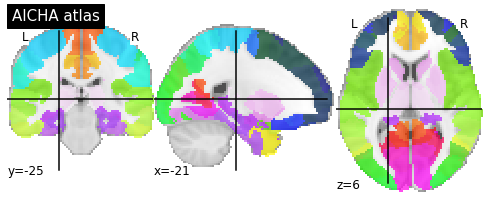

In [20]:
plotting.plot_roi(aicha, title="AICHA atlas")
plotting.show()

In [0]:
# Scale data (each feature will have average equal to 0 and unit variance)
scaler = StandardScaler()
scaler.fit(X)
X_scale=scaler.transform(X)

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scale, np.ravel(y), test_size=0.33, random_state=42)

Feature ranking:
1. feature 144 representing 145	S_Parietooccipital-4	146
 (0.062982)
2. feature 173 representing 174	N_Caudate-1	175
 (0.052843)
3. feature 172 representing 173	N_Amygdala-1	174
 (0.041808)
4. feature 183 representing 184	N_Thalamus-1	185
 (0.027071)
5. feature 189 representing 190	N_Thalamus-7	191
 (0.023972)
6. feature 170 representing 171	G_Fusiform-6	172
 (0.022256)
7. feature 72 representing 73	G_Insula-anterior-1	74
 (0.018509)
8. feature 188 representing 189	N_Thalamus-6	190
 (0.016884)
9. feature 97 representing 98	G_Temporal_Inf-5	99
 (0.012987)
10. feature 174 representing 175	N_Caudate-2	176
 (0.012738)


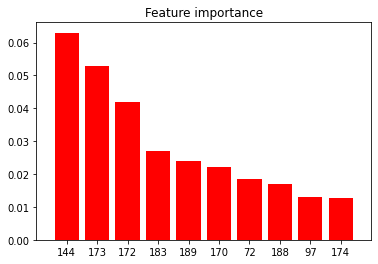

In [22]:
RF = RandomForestClassifier(criterion="gini", random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'min_samples_split': [2,3,4,5,6], 
             'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5)
grid_RF.fit(X_train, y_train)
best_params=grid_RF.best_params_
RF = RandomForestClassifier(criterion="gini",
                            min_samples_leaf=best_params["min_samples_leaf"], 
                            min_samples_split=best_params["min_samples_split"], 
                            max_features=best_params["max_features"],
                            n_estimators=best_params["n_estimators"], random_state=42)
RF.fit(X_train,y_train)

importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d representing %s (%f)" % (f + 1, indices[f], labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(10), importances[indices[0:10]], color="r", align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, 10])
plt.show()

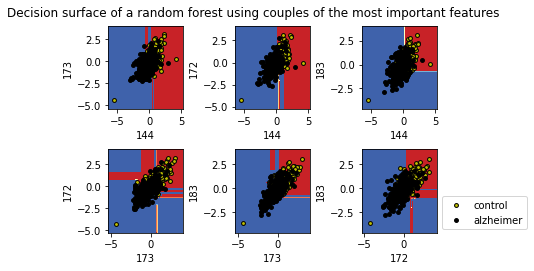

In [23]:
for pairidx, pair in enumerate([ [indices[0],indices[1]], [indices[0],indices[2]], [indices[0],indices[3]],
                                [indices[1],indices[2]], [indices[1],indices[3]], [indices[2],indices[3]] ]):
    # We only take the two corresponding features
    Xpair = X_train[:, pair]
    ypair = y_train

    # Train
    clf = RF.fit(Xpair, ypair)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = Xpair[:, 0].min() - 1, Xpair[:, 0].max() + 1
    y_min, y_max = Xpair[:, 1].min() - 1, Xpair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(2), "yk"):
        idx = np.where(ypair == i)
        plt.scatter(Xpair[idx, 0], Xpair[idx, 1], c=color, label=class_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a random forest using couples of the most important features")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.axis("tight")
plt.show()

In [24]:
# Choose Atlas (here HAMMERS)
X=T1HAMMERS
labels=ROIlabelsHAMMERS
hammers='./AtlasHAMMERS.nii'

N,M = X.shape # number subjects and ROIs
class_names = ["control","alzheimer"] # y=0, y=1

print('Number of controls and Alzheimer patients is respectively: {0} and {1}'.format(N-np.sum(y), np.sum(y)))
print('Number of ROI is: {0}'.format(M))

Number of controls and Alzheimer patients is respectively: 416.0 and 336.0
Number of ROI is: 68


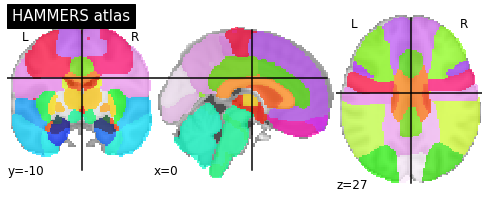

In [25]:
plotting.plot_roi(hammers, title="HAMMERS atlas")
plotting.show()

In [0]:
# Scale data (each feature will have average equal to 0 and unit variance)
scaler = StandardScaler()
scaler.fit(X)
X_scale=scaler.transform(X)

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scale, np.ravel(y), test_size=0.33, random_state=42)

Feature ranking:
1. feature 0 representing Left Hippocampus                       (0.091826)
2. feature 2 representing Left Amygdala                          (0.075089)
3. feature 3 representing Right Amygdala                         (0.060862)
4. feature 1 representing Right Hippocampus                      (0.054223)
5. feature 12 representing Left Inferior Middle Temporal Gyri     (0.043223)
6. feature 47 representing Right Lateral Temporal Ventricle       (0.029726)
7. feature 8 representing Left Ambient and Parahippocampus Gyri  (0.027050)
8. feature 44 representing Left Corpus Callosum                   (0.024546)
9. feature 40 representing Left Thalamus                          (0.022342)
10. feature 46 representing Left Lateral Temporal Ventricle        (0.022306)


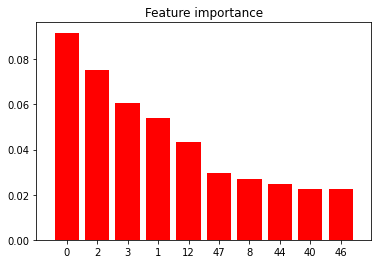

In [27]:
RF = RandomForestClassifier(criterion="gini", random_state=0)
p_grid_RF = {'n_estimators': [10,15,20,25,30], 'min_samples_leaf': [2,3,4,5,6], 'min_samples_split': [2,3,4,5,6], 
             'max_features': ['sqrt','log2']}   

grid_RF = GridSearchCV(estimator=RF, param_grid=p_grid_RF, scoring="accuracy", cv=5)
grid_RF.fit(X_train, y_train)
best_params=grid_RF.best_params_
RF = RandomForestClassifier(criterion="gini",
                            min_samples_leaf=best_params["min_samples_leaf"], 
                            min_samples_split=best_params["min_samples_split"], 
                            max_features=best_params["max_features"],
                            n_estimators=best_params["n_estimators"], random_state=42)
RF.fit(X_train,y_train)

importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d representing %s (%f)" % (f + 1, indices[f], labels[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(range(10), importances[indices[0:10]], color="r", align="center")
plt.xticks(range(10), indices[0:10])
plt.xlim([-1, 10])
plt.show()

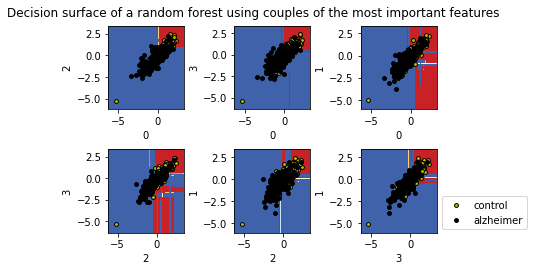

In [28]:
for pairidx, pair in enumerate([ [indices[0],indices[1]], [indices[0],indices[2]], [indices[0],indices[3]],
                                [indices[1],indices[2]], [indices[1],indices[3]], [indices[2],indices[3]] ]):
    # We only take the two corresponding features
    Xpair = X_train[:, pair]
    ypair = y_train

    # Train
    clf = RF.fit(Xpair, ypair)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = Xpair[:, 0].min() - 1, Xpair[:, 0].max() + 1
    y_min, y_max = Xpair[:, 1].min() - 1, Xpair[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(2), "yk"):
        idx = np.where(ypair == i)
        plt.scatter(Xpair[idx, 0], Xpair[idx, 1], c=color, label=class_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a random forest using couples of the most important features")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.axis("tight")
plt.show()

**Theoretical Questions**

**Question:** Please answer the two questions at slide 28 and 31 writing here the computations.

**Answer:**

* **For slide 28**: 
 * **Left tree**: $$L_{ent} = \frac{1}{2} H_{ent}(\mathcal{D}^g_n) + \frac{1}{2}H_{ent}(\mathcal{D}^d_n)$$ 
with: $$H_{ent}(\mathcal{D}^g_n) = - \frac{1}{4}log(\frac{1}{4}) - (1-\frac{1}{4})log(1-\frac{1}{4}) = 2 log(2) - \frac{3}{4} log(3) = H_{ent}(\mathcal{D}^d_n) \text{ by symmetry}$$ 
Hence: $$L_{ent} =  2 log(2) - \frac{3}{4} log(3) \approx 0.56$$

  * **Right tree**: $$L_{ent} = \frac{3}{4} H_{ent}(\mathcal{D}^g_n) + \frac{1}{4}H_{ent}(\mathcal{D}^d_n)$$ 
where: $$H_{ent}(\mathcal{D}^g_n) = - \frac{1}{3}log(\frac{1}{3}) - (1-\frac{1}{3})log(1-\frac{1}{3}) = log(3) - \frac{2}{3} log(2)$$ 
and: $$H_{ent}(\mathcal{D}^d_n) = 0$$ since it is a **pure node**.
As a result: 

$$L_{ent} =  \frac{3}{4} log(3) - \frac{1}{2} log(2) \approx 0.48$$

We can then conclude that the **right tree has a lower cost than the left one** (which is coherent with the presence of a pure node).

* **For slide 31**: 
 * **Left tree**: $$L_{gini} = \frac{1}{2} H_{gini}(\mathcal{D}^g_n) + \frac{1}{2}H_{gini}(\mathcal{D}^d_n)$$ 
with: $$H_{gini}(\mathcal{D}^g_n) = 2 \cdot \frac{1}{4} (1-\frac{1}{4}) = \frac{3}{8} = H_{gini}(\mathcal{D}^d_n) \text{ by symmetry}$$ 
Hence: $$L_{ent} =  \frac{3}{8}= 0.375$$

  * **Right tree**: $$L_{gini} = \frac{n_g}{n}H_{gini}(\mathcal{D}^g_n) + \frac{n_d}{n}H_{gini}(\mathcal{D}^d_n)= \frac{3}{4} H_{gini}(\mathcal{D}^g_n) + \frac{1}{4}H_{gini}(\mathcal{D}^d_n)$$ 
where: $$H_{gini}(\mathcal{D}^g_n) = 2 \cdot \frac{1}{3}(1-\frac{1}{3}) = \frac{4}{9}$$ 
And: $$H_{gini}(\mathcal{D}^d_n) = 0$$ since it is a **pure node**.
As a result: 

$$L_{gini} =  \frac{1}{3} \approx 0.33$$

Then again, we can then conclude that the **right tree has a lower cost than the left one** (once again coherent with the presence of a pure node).


